In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel("Data_Science.xlsx")

In [3]:
df.head()

,UserId,campaign,realcity,membership,gender,createdAt,Cost Of User Aciquistion,User Life Time Value (LTV)
0,u6Whdqhc9pbfpM2,FB-Device Targetting,Bengaluru,BRONZE,MALE,2018-11-25 17:38:33,100,0
1,PxpmIXN1OIWh4Ne,Organic,Delhi,BRONZE,MALE,2018-12-25 19:19:11,90,80
2,kpGUDDDhKBkwePp,Organic,Mumbai,NaN,MALE,2019-01-15 11:24:56,50,1900
3,BVmM3wUNvspBSrc,Organic,Pune,BRONZE,MALE,2018-04-30 17:17:18,10,1400
4,J9jtLsR52ylRDZ9,Organic,Pune,GOLD,MALE,2018-09-23 10:50:13,80,290


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
UserId                        100 non-null object
campaign                      96 non-null object
realcity                      87 non-null object
membership                    58 non-null object
gender                        100 non-null object
createdAt                     100 non-null datetime64[ns]
Cost Of User Aciquistion      100 non-null int64
User Life Time Value (LTV)    100 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 6.3+ KB


In [5]:
df.realcity.value_counts()

Kolkata      24
Hyderabad    18
Mumbai       13
Pune         13
Bengaluru     7
Chennai       6
Delhi         5
chennai       1
Name: realcity, dtype: int64

In [6]:
df[['realcity', 'User Life Time Value (LTV)']].corr()

,User Life Time Value (LTV)
User Life Time Value (LTV),1.0


## There is a bug in code which makes realcity is NULL , there is two data pattern which can help developer to find root cause of it , can you identify it ?

In [7]:
df.realcity.replace(to_replace=np.nan, value="Null", inplace = True)

In [8]:
df.realcity.value_counts()

Kolkata      24
Hyderabad    18
Mumbai       13
Null         13
Pune         13
Bengaluru     7
Chennai       6
Delhi         5
chennai       1
Name: realcity, dtype: int64

In [9]:
df.realcity.replace(to_replace="chennai", value="Chennai", inplace = True)

In [10]:
df1 = df[df.realcity == "Null"]
df1.head()

,UserId,campaign,realcity,membership,gender,createdAt,Cost Of User Aciquistion,User Life Time Value (LTV)
6,B5Ah0a6gbSdW0sN,referral,Null,NaN,FEMALE,2019-01-02 12:41:00,90,12090
7,B5ADHXCBrham4Yh,FB-airolimindspace-borivali,Null,NaN,FEMALE,2018-12-25 16:45:25,50,0
14,B5AptFA1YmrQ4Rw,referral,Null,NaN,FEMALE,2019-02-11 10:06:11,80,290
17,B5A7usayVnZx87F,NaN,Null,GOLD,FEMALE,2015-11-25 03:24:36,50,0
26,B5AVSCakEhhBwyf,FB_050119_Pune,Null,NaN,FEMALE,2019-02-05 12:27:02,90,1900


In [11]:
df1.campaign.value_counts()

referral                       3
Organic                        3
FB-airolimindspace-borivali    1
FB-Device Targetting           1
CPR_ A1                        1
CPR-B1                         1
FB_050119_Pune                 1
Name: campaign, dtype: int64

In [12]:
df1.membership.value_counts()

BRONZE    2
GOLD      2
Name: membership, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
UserId                        100 non-null object
campaign                      96 non-null object
realcity                      100 non-null object
membership                    58 non-null object
gender                        100 non-null object
createdAt                     100 non-null datetime64[ns]
Cost Of User Aciquistion      100 non-null int64
User Life Time Value (LTV)    100 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 6.3+ KB


In [14]:
df1.createdAt.dt.weekday_name

6     Wednesday
7       Tuesday
14       Monday
17    Wednesday
26      Tuesday
30     Saturday
38       Monday
42    Wednesday
43    Wednesday
46       Monday
64       Monday
67     Thursday
90       Friday
Name: createdAt, dtype: object

In [15]:
df1.gender.value_counts()

FEMALE    13
Name: gender, dtype: int64

In [16]:
df1

,UserId,campaign,realcity,membership,gender,createdAt,Cost Of User Aciquistion,User Life Time Value (LTV)
6,B5Ah0a6gbSdW0sN,referral,Null,NaN,FEMALE,2019-01-02 12:41:00,90,12090
7,B5ADHXCBrham4Yh,FB-airolimindspace-borivali,Null,NaN,FEMALE,2018-12-25 16:45:25,50,0
14,B5AptFA1YmrQ4Rw,referral,Null,NaN,FEMALE,2019-02-11 10:06:11,80,290
17,B5A7usayVnZx87F,NaN,Null,GOLD,FEMALE,2015-11-25 03:24:36,50,0
26,B5AVSCakEhhBwyf,FB_050119_Pune,Null,NaN,FEMALE,2019-02-05 12:27:02,90,1900
30,B5A67AAZH7ZNqmV,Organic,Null,NaN,FEMALE,2019-03-02 18:23:52,100,9000
38,B5A3hUiOS7c0cba,CPR-B1,Null,GOLD,FEMALE,2019-02-18 12:33:30,10,290
42,B5AN9fane0lv2hF,CPR_ A1,Null,NaN,FEMALE,2019-01-02 11:26:25,50,80
43,B5A7RbmptBEYVbw,Organic,Null,NaN,FEMALE,2017-12-06 09:51:03,10,1900
46,B5Ac4U9f5tuEkfI,NaN,Null,BRONZE,FEMALE,2015-11-02 14:18:02,90,234


In [17]:
df[~(df.realcity == "Null")]

,UserId,campaign,realcity,membership,gender,createdAt,Cost Of User Aciquistion,User Life Time Value (LTV)
0,u6Whdqhc9pbfpM2,FB-Device Targetting,Bengaluru,BRONZE,MALE,2018-11-25 17:38:33,100,0
1,PxpmIXN1OIWh4Ne,Organic,Delhi,BRONZE,MALE,2018-12-25 19:19:11,90,80
2,kpGUDDDhKBkwePp,Organic,Mumbai,NaN,MALE,2019-01-15 11:24:56,50,1900
3,BVmM3wUNvspBSrc,Organic,Pune,BRONZE,MALE,2018-04-30 17:17:18,10,1400
4,J9jtLsR52ylRDZ9,Organic,Pune,GOLD,MALE,2018-09-23 10:50:13,80,290
5,XuxQ7HB4MSE3eMI,CPR-B1,Mumbai,NaN,MALE,2018-12-20 07:10:59,100,234
8,INtl6ZR75QUyz7y,referral,Kolkata,NaN,MALE,2019-01-20 12:43:36,10,80
9,ylAiQ2lZuO5g1vp,Organic,Hyderabad,BRONZE,MALE,2017-09-01 11:52:18,80,1900
10,eyd5aLusSqA0c3f,referral,Kolkata,NaN,MALE,2019-01-31 09:08:13,100,1400
11,hF8azvA0BWFyNlg,referral,Kolkata,NaN,MALE,2019-02-09 17:29:08,90,290


# Python

## Load csv in pandas dataframe and create co-relation matrix between city and LTV

In [71]:
data = pd.read_excel("Data_Science.xlsx")
data.head()

,UserId,campaign,realcity,membership,gender,createdAt,Cost Of User Aciquistion,User Life Time Value (LTV)
0,u6Whdqhc9pbfpM2,FB-Device Targetting,Bengaluru,BRONZE,MALE,2018-11-25 17:38:33,100,0
1,PxpmIXN1OIWh4Ne,Organic,Delhi,BRONZE,MALE,2018-12-25 19:19:11,90,80
2,kpGUDDDhKBkwePp,Organic,Mumbai,NaN,MALE,2019-01-15 11:24:56,50,1900
3,BVmM3wUNvspBSrc,Organic,Pune,BRONZE,MALE,2018-04-30 17:17:18,10,1400
4,J9jtLsR52ylRDZ9,Organic,Pune,GOLD,MALE,2018-09-23 10:50:13,80,290


[]

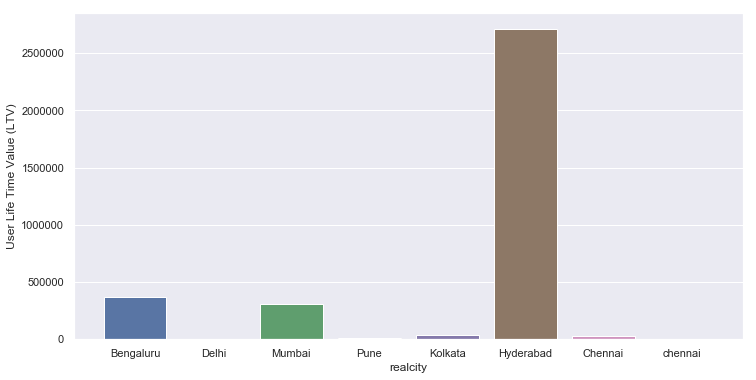

In [72]:
sns.set()
plt.figure(figsize=(12,6))
sns.barplot(x='realcity', y='User Life Time Value (LTV)', data = data, estimator=np.sum, ci=None)
plt.plot()

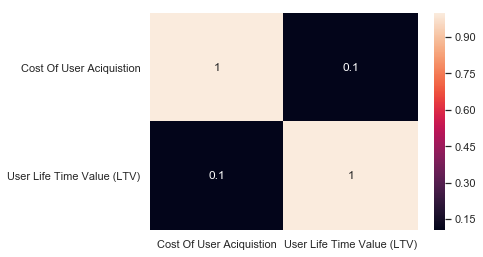

In [73]:
sns.heatmap(data = data.corr(), annot=True)

## Find distribution of users against LTV and draw distribution graph 

In [74]:
data.rename(columns={'User Life Time Value (LTV)':'LTV'}, inplace=True)

(array([97.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([      0.,  234908.,  469816.,  704724.,  939632., 1174540.,
        1409448., 1644356., 1879264., 2114172., 2349080.]),
 <a list of 10 Patch objects>)

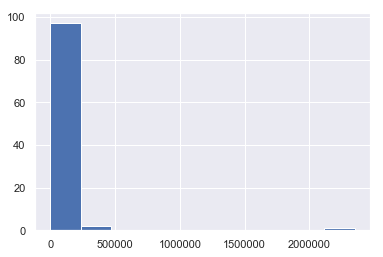

In [75]:
plt.hist(data['LTV'])

[]

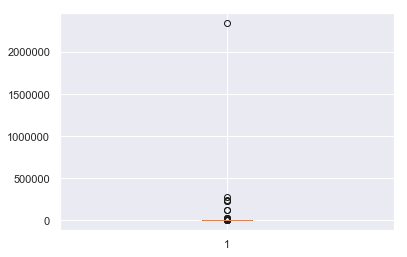

In [77]:
plt.boxplot(data['LTV'])
plt.plot()

In [78]:
data.describe()

,Cost Of User Aciquistion,LTV
count,100.000000,1.000000e+02
mean,65.600000,3.775015e+04
std,32.854746,2.390599e+05
min,10.000000,0.000000e+00
25%,50.000000,2.340000e+02
50%,80.000000,2.900000e+02
75%,90.000000,1.900000e+03
max,100.000000,2.349080e+06


In [79]:
q1 = data.LTV.quantile(0.25)
q3 = data.LTV.quantile(0.75)
IQR = q3 - q1

data = data[(data.LTV > q1 - 1.5*IQR) & (data.LTV < q3 + 1.5*IQR)]

In [80]:
data.describe()

,Cost Of User Aciquistion,LTV
count,84.000000,84.000000
mean,64.880952,620.238095
std,33.274834,715.844865
min,10.000000,0.000000
25%,50.000000,80.000000
50%,80.000000,290.000000
75%,90.000000,1400.000000
max,100.000000,2342.000000


In [81]:
data.shape

(84, 8)

(array([41., 18.,  0.,  0.,  0., 12.,  0.,  0., 12.,  1.]),
 array([   0. ,  234.2,  468.4,  702.6,  936.8, 1171. , 1405.2, 1639.4,
        1873.6, 2107.8, 2342. ]),
 <a list of 10 Patch objects>)

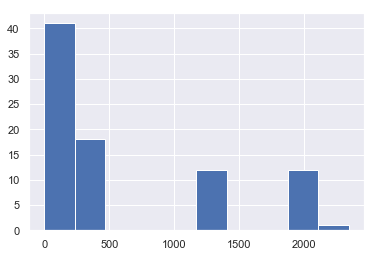

In [82]:
plt.hist(data['LTV'], histtype='bar')

[]

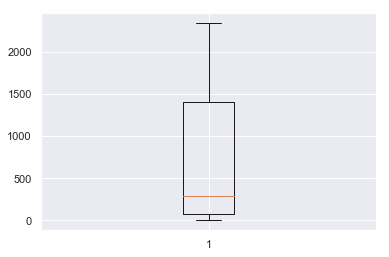

In [83]:
plt.boxplot(data['LTV'])
plt.plot()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


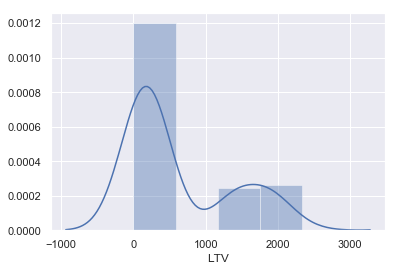

In [84]:
sns.distplot(data['LTV'])